In [1]:
import numpy as np
import matplotlib.pyplot as plt 

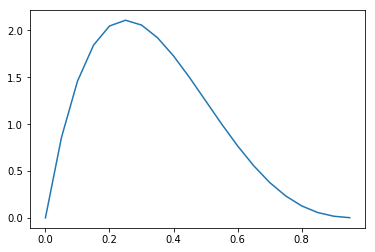

In [2]:
#1
def f(arg):
    return 20 * arg * (1 - arg)**3

args = np.arange(20, dtype=float) / 20;
plt.plot(args, f(args))

c = np.max(f(args)) + 2

(array([28., 39., 68., 49., 40., 35., 22., 13.,  4.,  2.]),
 array([0.0212048 , 0.10120744, 0.18121008, 0.26121273, 0.34121537,
        0.42121802, 0.50122066, 0.5812233 , 0.66122595, 0.74122859,
        0.82123124]),
 <a list of 10 Patch objects>)

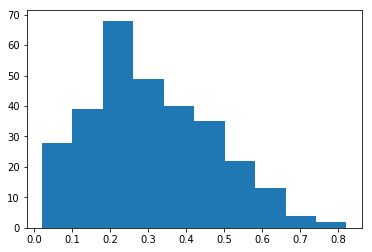

In [3]:
#1
N = 300
arr = np.zeros(N, dtype=float)
for i in range(N):
    X1 = np.random.rand()
    X2 = np.random.rand()
    while (X2 >= f(X1) / c):
        X1 = np.random.random()
        X2 = np.random.random()
    arr[i] = X1

plt.hist(arr)

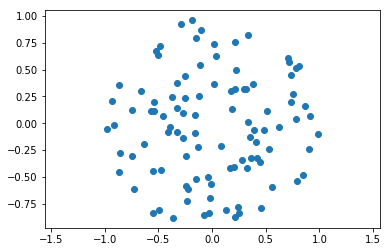

In [4]:
#2, 3 - equivalent
#R ~ 2 * r, Phi ~ 1 / (2 * Pi)
N = 100
rarr = np.random.rand(N, 2)
rarr[:, 1] = rarr[:, 1] * 2 * np.pi
rarr[:, 0] = np.sqrt(rarr[:, 0])

plt.axis('equal')
plt.scatter(rarr[:, 0] * np.cos(rarr[:, 1]), 
        rarr[:, 0] * np.sin(rarr[:, 1]))

In [5]:
#5 Question about neighbour!
N, C = 20, 200
def getNeighb(sub):
    tsum = 0
    res = np.zeros((N,  N), dtype=int) - 1
    res[0, 0] = 0
    for i in range(N):
        tsum += sub[i] * i
    for i in range(N):
        for j in range(i + 1, N):
            tsum -= sub[i] * i + sub[j] * j
            tsum += sub[i] * j + sub[j] * i
            
            if (tsum > C):
                res[i, j] = i * N + j
    return res

M = 100
sub = np.arange(N)
for i in range(M):
    res = getNeighb(sub)
    rmp = np.random.choice(res[res > -1])
    #Here we have to compute \alpha and then ...
    sub[rmp // N] , sub[rmp % N] = sub[rmp % N] , sub[rmp // N]

print(sub + 1)

[ 6  7 20 14 11  9 17 18  4 19 16  2 10  3  5 12  8 15 13  1]


In [6]:
#2.1

In [7]:
N = 10
th = np.random.random()
res = np.zeros(N, dtype=float)
for i in range(N):
    tmp = np.random.random()
    res[i] = np.log(tmp) / (-th * (i + 1))
print(res)

[16.04560336 31.53849888 30.7402338   3.91795094  0.59604351  2.00984864
  2.56821284  3.05201489  0.66967111  2.84523842]


In [8]:
#2.2

In [9]:
N, T, M = 40, 100, 10000

def getLength(path, points):
    length = 0
    for i in range(path.shape[0] - 1):
        length += np.sum((points[path[i]] - points[path[i + 1]])**2, axis=0)
    length += np.sum((points[path[0]] - points[path[path.shape[0] - 1]])**2, axis=0)
    return length

def temper(step):
    return T / (1 + step)

points = np.random.rand(N, 2)

In [10]:
def getSquaredLen(points, len_iter, count_iter):
    lenarr = np.zeros(count_iter, dtype=float)
    for t in range(count_iter):
        path = np.arange(points.shape[0])
        length = getLength(path, points)
        for i in range(len_iter):
            j, k = np.random.choice(np.arange(points.shape[0]), size=2)
            tpath = np.array(path)
            tpath[min(j, k) : max(j, k)] = tpath[min(j, k) : max(j, k)][::-1]
            tlength = getLength(tpath, points)
            if (tlength < length):
                path = tpath
                length = tlength
            elif (np.random.random() < np.exp(
                -(tlength - length) / temper(i))):
                path = tpath
                length = tlength
        lenarr[t] = length
    
    return lenarr

[0.99593653 1.01826094 1.00457939 1.09956529 1.03838995 1.02230198
 1.00215713 0.95583008 0.999444   1.03284379]


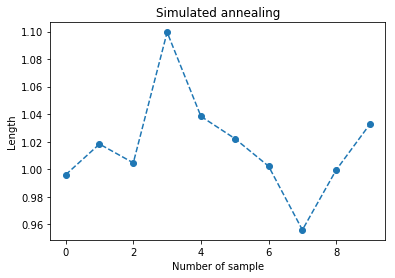

In [11]:
lenarr = np.sqrt(getSquaredLen(points, M, 10))

plt.plot(lenarr, marker='o', linestyle='--')
plt.xlabel('Number of sample')
plt.ylabel('Length')
plt.title('Simulated annealing')
print(lenarr)

1.0117577161463651


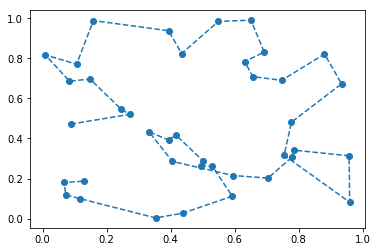

In [12]:
path = np.arange(points.shape[0])
length = getLength(path, points)

#Is there nessesary to change step if we don't change our path?
i = 0
while(i < M):
    j, k = np.random.choice(np.arange(N), size=2)
    tpath = np.array(path)
    tpath[min(j, k) : max(j, k)] = tpath[min(j, k) : max(j, k)][::-1]
    tlength = getLength(tpath, points)
    if (tlength < length):
        path = tpath
        length = tlength
    elif (np.random.random() < np.exp(
        -(tlength - length) / temper(i))):
        path = tpath
        length = tlength
    else:
        i -= 1
    i += 1

plt.plot(points[path, 0], points[path, 1], marker='o', linestyle='--')
print(length)